In [103]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision

# Training set

In [104]:
# mini_batch size
mb_size = 64
#translate data to tensor format which is pytorch's expected format
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])  # PIL image HWC 255 -> CHW 1.0
#训练集
trainset = torchvision.datasets.MNIST(root='./mnist', download=True, train=True, transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=mb_size)

## visualize input

In [105]:
data_iter = iter(trainloader)
#getting the next batch of the image and labels
images, labels = data_iter.next()   # images, a tensor, a mini-batch: B, C, H, W
print(images.size())
test = images.view(images.size(0), -1)  # B, C*H*W
print(test.size())

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


<class 'torch.Tensor'> torch.Size([3, 122, 482])
<class 'numpy.ndarray'> (3, 122, 482)


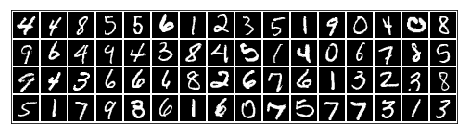

In [106]:
"""
imgs: B, C, H, W
"""
def imshow(imgs): 
    # tiles
    im = torchvision.utils.make_grid(imgs, nrow=16, padding=2, pad_value=1.0) # input: B,C,H,W  output: C, H1, W1
    print(type(im), im.size())
    npimg = im.numpy()   # convert to numpy
    print(type(npimg), npimg.shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # chw -> hwc
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(images)

# Global Params

In [113]:
x_dim = test.size(1)  # 784, input vector dim.
print('x_dim =', x_dim)
h_dim = 128    # hidden neurons
z_dim = 100    # dim. of the input noise for generator
lr = 1e-3      

x_dim = 784


# Models

In [114]:
def init_weights(m):  # init the params. of a module
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [121]:
class Generate(nn.Module):
    def __init__(self):
        super(Generate, self).__init__()  # must if children overriden __init__()
        self.predict = nn.Sequential(
            nn.Linear(z_dim, h_dim),
            #nn.BatchNorm1d(h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, x_dim),
            #nn.BatchNorm1d(x_dim),
            nn.Sigmoid()  # 1 / (1 + e^(-x))
        )
        self.predict.apply(init_weights)  # recursively apply to all children modules

    # override Module.forward() function 
    # m(input) equals to m.forward(input)
    def forward(self, input):    
        return self.predict(input)

In [122]:
class Dis(nn.Module):
    def __init__(self):
        super(Dis, self).__init__()  # must!
        self.predict = nn.Sequential(
            nn.Linear(x_dim, h_dim),
            #nn.BatchNorm1d(h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, 1),
            #nn.BatchNorm1d(1),
            nn.Sigmoid()
        )
        self.predict.apply(init_weights)
        
    def forward(self, input):
        return self.predict(input)

In [123]:
G = Generate()
D = Dis()

# Optimizer

In [124]:
G_solver = optim.Adam(G.parameters(), lr=lr)
D_solver = optim.Adam(D.parameters(), lr=lr)

# Training

In [125]:
zero_labels = torch.zeros(3, 1)
print(type(zero_labels))

<class 'torch.Tensor'>


batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 0, G_loss: 5.532328194646693, D_loss:0.06426594864432095
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


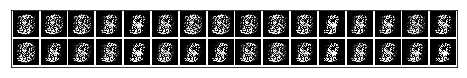

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 1, G_loss: 6.434881357241795, D_loss:0.034900874748621497
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


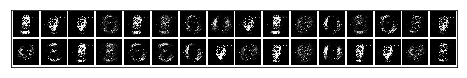

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 2, G_loss: 5.4095718525111804, D_loss:0.07261302168351977
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


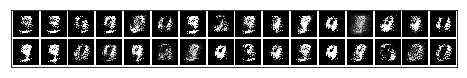

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 3, G_loss: 5.60793908420148, D_loss:0.09419815259864495
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


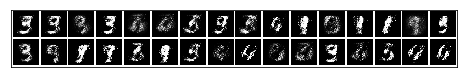

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 4, G_loss: 5.206571320989239, D_loss:0.18719887265216695
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


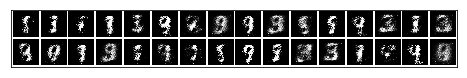

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 5, G_loss: 4.269741682863947, D_loss:0.31408072442515317
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


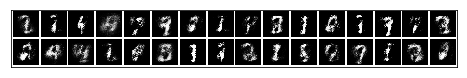

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 6, G_loss: 3.567254843488177, D_loss:0.43940875950112523
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


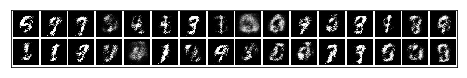

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 7, G_loss: 3.698474947831778, D_loss:0.4962539092691214
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


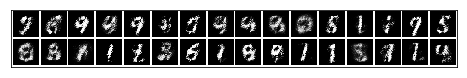

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 8, G_loss: 3.242128053072419, D_loss:0.5622728377231149
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


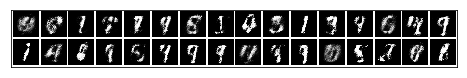

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 9, G_loss: 2.7006885644469434, D_loss:0.6517813167274634
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


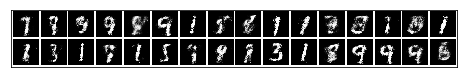

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 10, G_loss: 2.6899663541616916, D_loss:0.6714813222826671
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


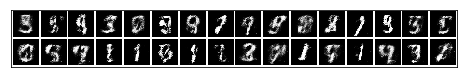

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 11, G_loss: 2.6086217703849774, D_loss:0.7017220737837525
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


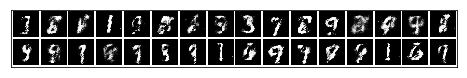

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 12, G_loss: 2.4202769574071805, D_loss:0.7149107206795515
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


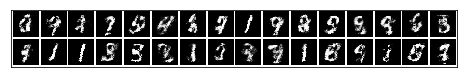

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 13, G_loss: 2.3282942236867794, D_loss:0.7539493134026842
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


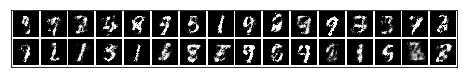

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 14, G_loss: 2.259130142390855, D_loss:0.7779774104100047
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


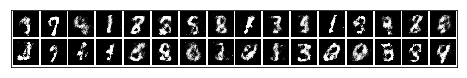

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 15, G_loss: 2.0612207346125198, D_loss:0.7726877039111754
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


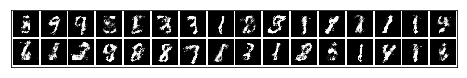

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 16, G_loss: 2.077179954758585, D_loss:0.7765550994351983
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


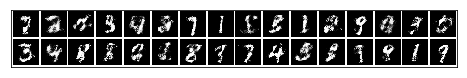

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 17, G_loss: 2.0311932542176643, D_loss:0.7812567440622142
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


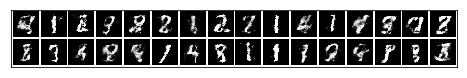

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 18, G_loss: 2.007222227450373, D_loss:0.793598861931992
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


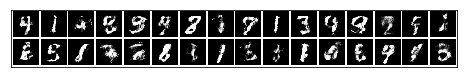

batch #0
batch #100
batch #200
batch #300
batch #400
batch #500
batch #600
batch #700
batch #800
batch #900
Epoch: 19, G_loss: 1.925191022566895, D_loss:0.7946572724435883
<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


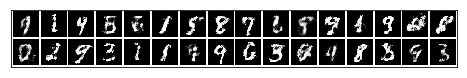

In [126]:
for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i, data in enumerate(trainloader):  # each batch
        if i % 100 == 0:
            print("batch #{}".format(i))
        X, label = data
        X = X.view(X.size(0), -1)  # (B, x_dim=C*H*W)
        mb_size = X.size(0)

        # Definig labels for real (1s) and fake (0s) images
        one_labels = torch.ones(mb_size, 1)
        zero_labels = torch.zeros(mb_size, 1)

        # Random normal distribution for each image
        z = torch.randn(mb_size, z_dim)

        # Feed forward in discriminator both
        D_real = D(X)     # prob. of taking real as real
        D_fake = D(G(z))  # prob. of taking fake as real

        # Defining the loss for Discriminator
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)  # bce() input are logits
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_fake_loss + D_real_loss

        # backward propagation for discriminator
        D_solver.zero_grad() # clear all parameters' grad
        D_loss.backward()  # autograd, compute all parameters' grad
        D_solver.step()  # update parameters

        # Feed forward for generator
        z = torch.randn(mb_size, Z_dim)
        D_fake = D(G(z))   # prob. of taking fake as real

        # loss function of generator
        G_loss = F.binary_cross_entropy(D_fake, one_labels)  # max log D(G(z)), approx. min log(1-D(G(z)))

        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()   
        G_solver.step()     

        G_loss_run += G_loss.item()   # .item() returns a scalar (0-dim tensor)
        D_loss_run += D_loss.item()  
        

    print('Epoch: {}, G_loss: {}, D_loss:{}'.format(epoch, G_loss_run / (i + 1), D_loss_run / (i + 1)))
    samples = G(z).detach()  # detach from dynamically computational graph (DCG)
    samples = samples.view(mb_size, 1, 28, 28)
    imshow(samples)

# Testing

<class 'torch.Tensor'> torch.Size([3, 62, 482])
<class 'numpy.ndarray'> (3, 62, 482)


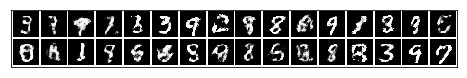

In [102]:
z = torch.randn(mb_size, z_dim)
G.eval()  # !! lock BN params.
outs = G(z).detach().view(mb_size, 1, 28, 28)
imshow(outs)